In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing,models,layers
from keras.layers import MaxPool2D,BatchNormalization,Conv2D,Flatten,Dense
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import cv2

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [51]:
class_names=dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [20]:
print(len(dataset))

313


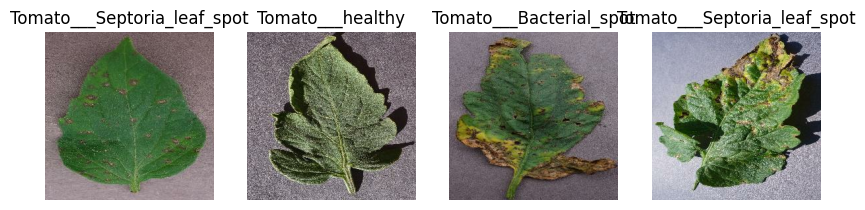

In [22]:
plt.figure(figsize=(10,10))
for image,label in dataset.take(1):
    for i in range(4):
        plt.subplot(3,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis('off')
        
        
        

In [28]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.2,shuffle=True,shuffle_size=10000):
    ds_size=len(dataset)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    train_ds=dataset.take(train_size)
    
   
   
    valid_ds=dataset.skip(train_size)
    
    return train_ds,valid_ds

In [29]:
train_dataset,valid_dataset=get_dataset_partition(dataset)

In [31]:
print(len(dataset))
print(len(train_dataset))
print(len(valid_dataset))

313
250
63


In [9]:
resize_rescale=tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
    ])

In [23]:
input_shape=(32,256,256,3)
model=models.Sequential([
    resize_rescale,
    
    layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=(32,256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')


    
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 60, 60, 64)         

In [25]:
model.compile(optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [32]:
history=model.fit(train_dataset,epochs=10,batch_size=32,verbose=1,validation_data=valid_dataset)

Epoch 1/10
250/250 [==============================] - 567s 2s/step - loss: 1.5551 - accuracy: 0.4246 - val_loss: 1.0669 - val_accuracy: 0.6250
Epoch 2/10
250/250 [==============================] - 551s 2s/step - loss: 0.8789 - accuracy: 0.6861 - val_loss: 0.8256 - val_accuracy: 0.7105
Epoch 3/10
250/250 [==============================] - 545s 2s/step - loss: 0.6538 - accuracy: 0.7695 - val_loss: 0.6168 - val_accuracy: 0.7870
Epoch 4/10
250/250 [==============================] - 552s 2s/step - loss: 0.5163 - accuracy: 0.8149 - val_loss: 0.5590 - val_accuracy: 0.8005
Epoch 5/10
250/250 [==============================] - 548s 2s/step - loss: 0.4562 - accuracy: 0.8388 - val_loss: 0.4750 - val_accuracy: 0.8470
Epoch 6/10
250/250 [==============================] - 552s 2s/step - loss: 0.3715 - accuracy: 0.8704 - val_loss: 0.4238 - val_accuracy: 0.8655
Epoch 7/10
250/250 [==============================] - 547s 2s/step - loss: 0.3256 - accuracy: 0.8849 - val_loss: 0.4181 - val_accuracy: 0.8610

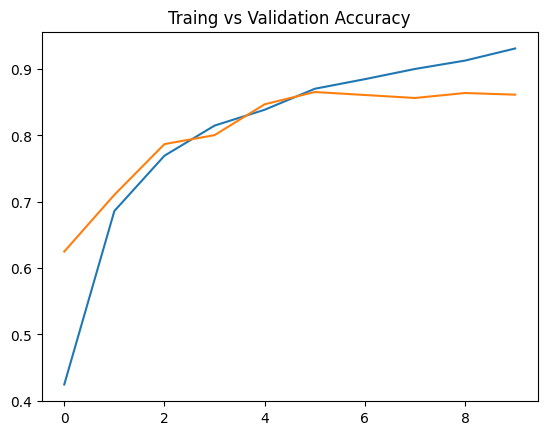

In [55]:
plt.plot(history.history['accuracy'],label="Training ACcuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Traing vs Validation Accuracy")
plt.show()


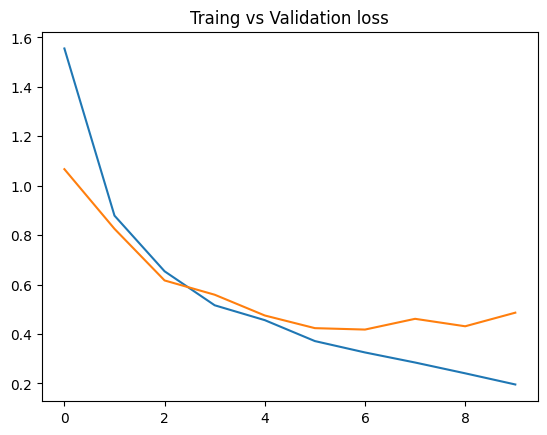

In [56]:
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.title("Traing vs Validation loss")
plt.show()

In [39]:
print(len(test_dataset))

32


First Image To Predict: 
Actual Label:  Tomato___Septoria_leaf_spot
1/1 [==============================] - 0s 430ms/step
Predicted Label:  Tomato___Septoria_leaf_spot


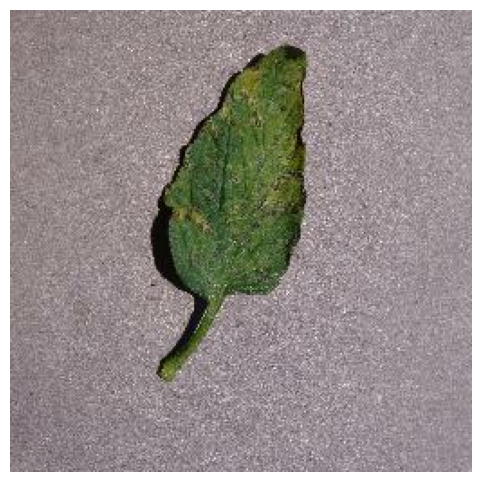

In [66]:

for image_batch1,label_batch1 in test_dataset.take(1):
    #for i in range(12):
        
        first_image=image_batch1[0].numpy().astype('uint8')
        first_batch=label_batch1[0].numpy()
        plt.figure(figsize=(6,6))
        plt.axis('off')
        print("First Image To Predict: ")
        plt.imshow(first_image)
        print("Actual Label: ",class_names[first_batch])

        batch_prediction=model.predict(image_batch1)
        print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])
        

In [67]:
scores=model.evaluate(test_dataset)

32/32 [==============================] - 13s 406ms/step - loss: 0.7173 - accuracy: 0.8140


1153
